In [1]:
from os.path import abspath, dirname, join

import plotly.graph_objects as go
import plotly.express as px

import pandas as pd

import plotly.express as px
import numpy as np

import requests

from bs4 import BeautifulSoup

from yahooquery import Ticker

# C:\Users\antoi\Documents\Programming\portfolio-advisor\dashboard

data_path = 'dashboard/data/tickers_september_2017_earnings.csv'

In [3]:
def get_tickers():
    with open(data_path, 'rb') as fp:
        stock_df = pd.read_excel(fp)
        stock_df = stock_df.dropna()
        # stock_df = stock_df.where(pd.notnull(stock_df), None)
        return stock_df

In [2]:
df = pd.read_csv("dashboard/data/tickers_september_2017_earnings.csv")
cols = [c for c in df.columns if c.lower()[:7] != 'unnamed']
df = df[cols]
df.tail()

,Ticker,Name,Exchange,Category Name,Country,ratio,earnings
20723,2GB.F,2G energy AG,FRA,Diversified Machinery,France,NaN,NaN
20724,A7A.F,FinLab AG,FRA,Asset Management,France,NaN,NaN
20725,GROG,"GroGenesis, Inc.",PNK,Agricultural Chemicals,USA,NaN,NaN
20726,INDSWFTLTD.NS,Ind-Swift Limited,NSI,Drugs - Generic,India,NaN,NaN
20727,N1H.AX,N1 Holdings Limited,ASX,Mortgage Investment,Australia,NaN,NaN


In [4]:
def update_current_ratio(row):
    name = row['Ticker']
#     if row['ratio'] == None:
#         bs = requests.get(f'https://financialmodelingprep.com/api/v3/financials/balance-sheet-statement/{ticker}?period=quarter')
#         bs = bs.json()
#         try:
#             total_assets = bs.get("financials")[0].get("Total assets")
#             total_liabilities = bs.get("financials")[0].get('Total liabilities')
#             try:
#                 ratio = float(total_assets)/float(total_liabilities)
#                 return ratio
#             except ZeroDivisionError:
#                 print("ZeroDivisionError, total_liabilities: ", ticker, " ", total_liabilities)
#             except ValueError:
#                 print("ValueError, total_assets", total_assets, " total_liabilities", total_liabilities)
#         except TypeError:
#             print("ticker: ", ticker)
#             pass # here we will try with webscrapping
    if type(row['ratio']) != str:
        isnan = np.isnan(row['ratio'])
        if isnan or (row['ratio'] == None):    
            ticker = Ticker(name)
            try:
                totalAssets = ticker.balance_sheet()['totalAssets'][0]
                totalLiab =  ticker.balance_sheet()['totalLiab'][0]
                ratio = float(totalAssets)/float(totalLiab)
                return ratio
            except KeyError:
                print(name, ": KeyError")


In [5]:
from yahooquery import Ticker


def update_earnings(row):
    name = row['Ticker']
    if type(row['earnings']) != str:
        isnan = np.isnan(row['earnings'])
        if isnan or (row['earnings'] == None):
    #         try:
    #             URL = f"https://finance.yahoo.com/quote/{ticker}/financials?p={ticker}"
    #             r = requests.get(URL) 
    #             soup = BeautifulSoup(r.content)
    #             total_revenue = soup.find('span', string='Total Revenue').parent.parent.next_sibling.text
    #             return total_revenue
    #         except Exception as e:
    #             print(ticker, ": ", e)
    #             try:
    #                 url = 'https://financialmodelingprep.com/'
    #                 api = 'api/v3/financials/income-statement/'
    #                 search_api_url = url + api + ticker
    #                 response = requests.get(
    #                     search_api_url
    #                 )
    #                 json = response.json()
    #                 earnings = json['financials'][0]['Revenue']
    #                 try:
    #                     earnings = float(earnings)
    #                 except ValueError:
    #                     print("ValueError, ticker: ", ticker,", earnings: ", earnings)
    #                 return earnings
    #             except KeyError:
    #                 print("financialmodelingprep failed, ticker: ", ticker)
            ticker = Ticker(name)
            try:
                earnings= ticker.income_statement().totalRevenue[0]
                return earnings
            except AttributeError:
                print(name, ": AttributeError")
        else:
            return row['earnings']


In [67]:
def update_current_ratio_US(row):
    try:
        ticker = row['Ticker']
        bs = requests.get(f'https://financialmodelingprep.com/api/v3/financials/balance-sheet-statement/{ticker}?period=year')
        bs = bs.json()
        total_assets = bs.get("financials")[0].get("Total assets")
        total_liabilities = bs.get("financials")[0].get('Total liabilities')
        try:
            ratio = float(total_assets)/float(total_liabilities)
            print("ratio: ", ratio)
            return ratio
        except ZeroDivisionError:
            print("ZeroDivisionError, total_liabilities: ", ticker, " ", total_liabilities)
        except ValueError:
            print("ValueError, total_assets", total_assets, " total_liabilities", total_liabilities)
    except TypeError:
        print("ticker: ", ticker)

In [52]:
df['ratio'] = df.apply(update_current_ratio_US, axis = 1)

ratio:  1.3648297772832099
ratio:  1.1220733804797838
ratio:  1.380297570899821
ratio:  1.5773914535291007
ratio:  3.7051177031436744
ratio:  1.1445329740528236
ratio:  1.3123195184447065
ratio:  1.390911683620116
ratio:  1.1316462196861625
ratio:  2.011898265549599
ratio:  2.759930678288922
ratio:  1.8448055653686242
ratio:  1.9051769830680236
ratio:  1.7598519888991675
ratio:  1.1933285365951154
ratio:  0.9980370302596776
ratio:  1.1293802209708854
ratio:  1.2343600514642006
ratio:  2.0291148227979297
ratio:  3.7051177031436744
ratio:  1.9368134654524138
ratio:  0.9160011101174874
ratio:  1.93566110180098
ratio:  1.07107297869092
ratio:  2.7755082007444067
ratio:  1.2191624023700511
ratio:  1.1479919315497236
ratio:  1.2664993726474278
ratio:  2.0922772899268063
ratio:  1.1539356216713064
ratio:  9.5
ratio:  2.8188920454545454
ratio:  0.9779849328944037
ratio:  1.7760778298078477
ticker:  BMH.AX
ratio:  1.5333212357664565
ratio:  11.437228467338151
ratio:  1.6120898960343646
ratio:  

ratio:  1.1747965832058285
ratio:  1.6252576389019582
ratio:  1.742531579355472
ratio:  1.0701730279009753
ratio:  3.651585261353899
ticker:  ADHD
ratio:  0.35081473367109406
ratio:  1.5728207371184662
ratio:  1.1015689068738825
ratio:  1.3839892798650058
ticker:  ABY
ratio:  1.4519653930534397
ratio:  1.918833339733881
ratio:  1.6185973104464764
ratio:  1.331623622085543
ratio:  1.515854614273226
ratio:  1.9873000236125111
ratio:  2.48727683874317
ratio:  1.5567692014748395
ratio:  6.10166082112647
ratio:  1.1068478783376305
ratio:  7.812293300576396
ratio:  3.7741479900551838
ratio:  1.638651049647974
ratio:  2.0012581765549786
ratio:  1.3893631534343414
ratio:  6.935042338475815
ratio:  1.5839713516919907
ratio:  1.753423137485601
ticker:  ADS.DE
ratio:  2.822940487278946
ratio:  1.4503284661028153
ratio:  2.6199373502080516
ratio:  1.302201568578028
ratio:  5.371136389750661
ratio:  1.464748712484461
ratio:  1.1950737254622779
ratio:  1.1377907259022988
ratio:  2.8640344568923206
r

ticker:  ADVC
ticker:  ABBB
ratio:  2.593797236620428
ticker:  WPL.AX
ticker:  WIHL.ST
ticker:  WHC.AX
ticker:  WES.AX
ticker:  VWS.CO
ticker:  VOLV-B.ST
ticker:  VMS.AX
ticker:  VKA.AX
ticker:  UCW.AX
ticker:  TZL.AX
ticker:  TWCF
ticker:  TLS.AX
ticker:  TGRO
ticker:  SXL.AX
ticker:  STL.OL
ratio:  11.024134346873
ticker:  SIGL
ticker:  SCA-A.ST
ticker:  SAS.ST
ticker:  REZT.ST
ticker:  REA.AX
ticker:  RBA.TO
ticker:  PDL.TO
ticker:  PACT.ST
ticker:  NMS.AX
ticker:  NME.AX
ticker:  NAB.AX
ticker:  MDA.TO
ticker:  LUND-B.ST
ticker:  LO3.DE
ticker:  LER.AX
ticker:  LCT.AX
ticker:  LAU.AX
ticker:  LAME4.SA
ticker:  KOV.AX
ticker:  KME.AX
ticker:  KBC.AX
ticker:  IVX.DE
ticker:  IRI.AX
ticker:  ALME
ticker:  HLDX.ST
ticker:  HIL.AX
ratio:  1.1018518518518519
ratio:  0.0
ticker:  GIL.TO
ratio:  1.0735350208281829
ticker:  FBAK
ticker:  FABK
ticker:  E5H.SI
ticker:  DBRM
ticker:  CPU.AX
ticker:  CMW.AX
ticker:  CLAS-B.ST
ticker:  CBA.AX
ticker:  BILL.ST
ticker:  BHARTIARTL.NS
ticker:  BBG.

ratio:  1.8810862213753852
ratio:  3.310262200043339
ratio:  1.5967016491754122
ratio:  1.023844058555897
ratio:  1.5854759350375496
ratio:  1.041767660585782
ratio:  0.9185104673145744
ratio:  0.9498890400171809
ratio:  1.8128553584185219
ratio:  1.4177046061027962
ratio:  4.474008634118118
ratio:  1.7556049849018875
ratio:  1.5900739244423432
ratio:  1.0624858759072784
ratio:  2.283152150924242
ticker:  BBD-B.TO
ratio:  0.820059763544238
ratio:  1.8137156262481735
ratio:  1.1213612189934896
ratio:  1.4767010641728475
ticker:  GABA
ratio:  0.8695639828803421
ratio:  1.5912518853695323
ratio:  1.1288859109612819
ratio:  0.8159784371117522
ratio:  1.0613456151179905
ratio:  1.0803110714581359
ratio:  1.229610141114566
ratio:  5.4503937007874015
ratio:  1.0
ValueError, total_assets 1673477000000.0  total_liabilities 
ratio:  1.8786729092670327
ratio:  1.786955817512398
ratio:  3.820231980679615
ratio:  6.268884826734196
ratio:  2.259150949595847
ratio:  1.173858084068764
ratio:  0.641442

ratio:  1.8053188823455708
ratio:  2.8401375957814947
ratio:  1.7102882141157427
ratio:  2.635077887537994
ratio:  0.9282338026513529
ratio:  2.714733815870512
ratio:  1.168281799276605
ratio:  1.7506582678441223
ratio:  1.807469414037347
ratio:  1.3425007994883276
ratio:  1.1447806025741878
ratio:  1.1037066129375022
ratio:  1.1523605150214593
ratio:  2.1769133947785133
ratio:  1.1629170484693359
ratio:  1.1206431141542805
ratio:  1.1410987585926278
ratio:  1.1266910828322638
ratio:  4.1579714621448804
ratio:  1.129513417988194
ratio:  6.0
ratio:  1.1380143896287296
ratio:  1.14255562461156
ratio:  3.5963260674961677
ratio:  1.9326555235124478
ratio:  1.1672514297636853
ratio:  1.1248871050758669
ValueError, total_assets 99205000000.0  total_liabilities 
ValueError, total_assets 1711000000.0  total_liabilities 
ratio:  1.1020464905554068
ratio:  2.308864523963954
ratio:  5.173685231903745
ratio:  1.0145474363178393
ratio:  1.0912468034775067
ratio:  1.1247646997223648
ratio:  0.984954

From cffi callback <function _verify_callback at 0x000001A966ABDC80>:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 311, in wrapper
    @wraps(callback)
KeyboardInterrupt


SSLError: HTTPSConnectionPool(host='financialmodelingprep.com', port=443): Max retries exceeded with url: /api/v3/financials/balance-sheet-statement/IIBK?period=year (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

In [42]:
# df['ratio'] = np.where(df['Country'] != 'USA', 
#          df.apply(update_current_ratio_US, axis = 1), 
#          df['ratio'])

In [ ]:
df.head()

In [3]:
from yahooquery import Ticker


def update_earnings_US(row):
    name = row['Ticker']
    if type(row['earnings']) != str:
#         print(row['earnings'])
#         isnan = np.isnan(row['earnings'])
        if (row['earnings'] == None):
            try:
                URL = f"https://finance.yahoo.com/quote/{name}/financials?p={name}"
                r = requests.get(URL) 
                soup = BeautifulSoup(r.content)
                total_revenue = soup.find('span', string='Total Revenue').parent.parent.next_sibling.text
                return total_revenue
            except Exception as e:
                try:
                    url = 'https://financialmodelingprep.com/'
                    api = 'api/v3/financials/income-statement/'
                    search_api_url = url + api + name
                    response = requests.get(
                        search_api_url
                    )
                    json = response.json()
                    earnings = json['financials'][0]['Revenue']
                    try:
                        earnings = float(earnings)
                    except ValueError:
                        print("ValueError, ticker: ", name,", earnings: ", earnings)
                    return earnings
                except KeyError:
                    print("financialmodelingprep failed, ticker: ", name)

In [7]:
def update_dividends(row):
    ticker = row['Ticker']
    stock = yf.Ticker(ticker)
    try:
        if len(stock.dividends)<10:
            return False
        for dividend in stock.dividends.tail(10):
            if dividend == 0.0:
                return False
        return True
    except:
        return False

In [47]:
pd.set_option('display.max_columns', None)

In [14]:
def update_current_ratio(entity):


    ticker = Ticker(entity)
    df = ticker.balance_sheet()
    df = df.reset_index(drop=True)
    cols = df.columns

    # I need to get rid of it if doesn't exists
    # Assets 
    cash = df["cash"][0]
    shortTermInvestments = df["shortTermInvestments"][0]
    netReceivables = df["netReceivables"][0]
    inventory = df["inventory"][0]
    otherCurrentAssets = df["otherCurrentAssets"][0]
    totalCurrentAssets = df["totalCurrentAssets"][0]
    longTermInvestments = df["longTermInvestments"][0]
    propertyPlantEquipment = df["propertyPlantEquipment"][0]
    goodWill = df["goodWill"][0]
    intangibleAssets = df["intangibleAssets"][0]
    otherAssets = df["otherAssets"][0]
    deferredLongTermAssetCharges = df["deferredLongTermAssetCharges"][0]
    totalAssets = df["totalAssets"][0]
    
    # liabilities
    accountsPayable = df["accountsPayable"][0]
    otherCurrentLiab = df["otherCurrentLiab"][0]
    longTermDebt = df["longTermDebt"][0]
    otherLiab = df["otherLiab"][0]
    totalCurrentLiabilities = df["totalCurrentLiabilities"][0]
    totalLiab = df["totalLiab"][0]
    commonStock = df["commonStock"][0]
    retainedEarnings = df["retainedEarnings"][0]
    treasuryStock = df["treasuryStock"][0]
    otherStockholderEquity = df["otherStockholderEquity"][0]
    totalStockholderEquity = df["totalStockholderEquity"][0]
    netTangibleAssets = df["netTangibleAssets"][0]
    
    ratio = float(totalCurrentAssets)/float(totalCurrentLiabilities)

    if ratio > 2:
        financial_status = "Conservatively financed"
    elif ratio > 1:
        financial_status = "Be careful"
    else:
        financial_status = "indebted"
    
    data = dict(
        asset_and_liability =[financial_status, totalCurrentAssets, "totalCurrentLiabilities"],
        parent=["", financial_status, financial_status],
        value = [ratio, totalCurrentAssets, totalCurrentLiabilities]

    )
    fig = px.sunburst(
            data,
            names='asset_and_liability',
            parents='parent',
            values = 'value'
        )
        
    return fig

In [15]:
update_current_ratio("GOOG")

In [44]:
ticker = Ticker("GOOG")
df = ticker.balance_sheet()

In [45]:
cols = df.columns
df = df.reset_index(drop=True)
series = df.iloc[0, cols.get_loc('endDate')+1 : cols.get_loc('totalCurrentAssets')]

In [46]:
ticker.balance_sheet()


maxAge     endDate         cash  shortTermInvestments  \
symbol row                                                          
GOOG   0         1  2019-12-31  18498000000          101177000000   
       1         1  2018-12-31  16701000000           92439000000   
       2         1  2017-12-31  10715000000           91156000000   
       3         1  2016-12-31  12918000000           73415000000   

            netReceivables   inventory  otherCurrentAssets  \
symbol row                                                   
GOOG   0       27492000000   999000000          4412000000   
       1       21193000000  1107000000          4236000000   
       2       18705000000   749000000          2983000000   
       3       15632000000   268000000          3175000000   

            totalCurrentAssets  longTermInvestments  propertyPlantEquipment  \
symbol row                                                                    
GOOG   0          152578000000          13078000000             84587000000   
       1          135676000000          13859000000             59719000000   
       2          124308000000           7813000000             42383000000   
       3          105408000000           5878000000             34234000000   

            ...  longTermDebt    otherLiab  totalCurrentLiabilities  \
symbol row  ...                                                       
GOOG   0    ...    3958000000  14478000000              45221000000   
       1    ...    3950000000  16532000000              34620000000   
       2    ...    3943000000  16641000000              24183000000   
       3    ...    3935000000   7770000000              16756000000   

              totalLiab  commonStock  retainedEarnings  treasuryStock  \
symbol row                                                              
GOOG   0    74467000000  50552000000      152122000000    -1232000000   
       1    55164000000  45049000000      134885000000    -2306000000   
       2    44793000000  40247000000      113247000000     -992000000   
       3    28461000000  36307000000      105131000000    -2402000000   

            otherStockholderEquity  totalStockholderEquity  netTangibleAssets  
symbol row                                                                     
GOOG   0               -1232000000            201442000000       178839000000  
       1               -2306000000            177628000000       157520000000  
       2                -992000000            152502000000       133063000000  
       3               -2402000000            139036000000       119261000000  

[4 rows x 27 columns]

In [47]:
for col in df.columns:
    print(col+" = df[\""+col+"\"][0]")

maxAge = df["maxAge"][0]
endDate = df["endDate"][0]
cash = df["cash"][0]
shortTermInvestments = df["shortTermInvestments"][0]
netReceivables = df["netReceivables"][0]
inventory = df["inventory"][0]
otherCurrentAssets = df["otherCurrentAssets"][0]
totalCurrentAssets = df["totalCurrentAssets"][0]
longTermInvestments = df["longTermInvestments"][0]
propertyPlantEquipment = df["propertyPlantEquipment"][0]
goodWill = df["goodWill"][0]
intangibleAssets = df["intangibleAssets"][0]
otherAssets = df["otherAssets"][0]
deferredLongTermAssetCharges = df["deferredLongTermAssetCharges"][0]
totalAssets = df["totalAssets"][0]
accountsPayable = df["accountsPayable"][0]
otherCurrentLiab = df["otherCurrentLiab"][0]
longTermDebt = df["longTermDebt"][0]
otherLiab = df["otherLiab"][0]
totalCurrentLiabilities = df["totalCurrentLiabilities"][0]
totalLiab = df["totalLiab"][0]
commonStock = df["commonStock"][0]
retainedEarnings = df["retainedEarnings"][0]
treasuryStock = df["treasuryStock"][0]
otherStockholderEq

In [48]:
df['shortTermInvestments'][0]

101177000000

In [49]:
li

NameError: name 'li' is not defined

In [50]:
test = ["ratio, total_assets"]

In [104]:
test.insert(2,li)


In [105]:
test

['ratio, total_assets',
 [18498000000, 101177000000, 27492000000, 999000000, 4412000000]]

In [42]:
ticker = Ticker("GOOG")
df = ticker.balance_sheet()
df = df.reset_index(drop=True)

# Assets
current_assets = df.iloc[0, cols.get_loc('endDate')+1 : cols.get_loc('totalCurrentAssets')]
non_current_assets = df.iloc[0, cols.get_loc("longTermInvestments")+1:
                             cols.get_loc("deferredLongTermAssetCharges")]
total_assets = df.iloc[0,cols.get_loc("totalAssets")]

# liabilities
total_liabilities = df.iloc[0,cols.get_loc("totalLiab")]

ratio = float(total_assets)/float(total_liabilities)

if ratio > 2:
    financial_status = "Conservatively financed"
elif ratio > 1:
    financial_status = "Be careful"
else:
    financial_status = "indebted"

asset_and_liability =[financial_status, "total_assets", "total_liabilities"]+ ["total_current_assets"] + current_assets.keys().tolist() + ["total_non_current_assets"] + non_current_assets.keys().tolist(),
parent=["", financial_status, financial_status, "total_assets", *["total_non_current_assets"] 
        * len(non_current_assets), "total_assets", *["total_current_assets"] * len(current_assets)],
value = [ratio, total_assets, total_liabilities] + [sum(current_assets), sum(non_current_assets)] + current_assets.values.tolist() + non_current_assets.values.tolist()

ConnectionError: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v10/finance/quoteSummary/GOOG?modules=balanceSheetHistory (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000208F7811048>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [149]:
# len(value) 
parent[0]

['',
 'Conservatively financed',
 'Conservatively financed',
 'total_assets',
 'total_non_current_assets',
 'total_non_current_assets',
 'total_non_current_assets',
 'total_non_current_assets',
 'total_assets',
 'total_current_assets',
 'total_current_assets',
 'total_current_assets',
 'total_current_assets',
 'total_current_assets']

In [132]:
non_current_assets

propertyPlantEquipment    84587000000
goodWill                  20624000000
intangibleAssets           1979000000
otherAssets                3063000000
Name: 0, dtype: object

# EPF

In [5]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl

from yahooquery import Ticker

#import scipy.optimize as scoplt.style.use('fivethirtyeight')
np.random.seed(777) 

# matplotlib inline
#config InlineBackend.figure_format = 'retina'

In [6]:
def price_maker(tickers):
    df_concated = pd.DataFrame()
    for ticker_name in tickers:
        ticker = Ticker(ticker_name)
        df = ticker.history(period='max', interval='1d', start='2016-01-04', end='2020-05-08')
        try:
            df_concated = pd.concat([df_concated, df['close'].rename(str(ticker_name))], axis=1)
        except KeyError:
            print("ticker_name: ", ticker_name)
    return df_concated
        
tickers = ['AAPL','AMZN','GOOGL','FB']
df = price_maker(tickers)
df.index = pd.to_datetime(df.index)
df = df.resample("1D").sum()
df = df[~df.isin([0])].dropna() # getting rid of weekends where stocks = 0
df.tail(20)

,AAPL,AMZN,GOOGL,FB
2020-04-09,267.989990,2042.760010,1206.569946,175.190002
2020-04-13,273.250000,2168.870117,1210.410034,174.789993
2020-04-14,287.049988,2283.320068,1265.229980,178.169998
2020-04-15,284.429993,2307.679932,1257.300049,176.970001
2020-04-16,286.690002,2408.189941,1257.430054,176.250000
2020-04-17,282.799988,2375.000000,1279.000000,179.240005
2020-04-20,276.929993,2393.610107,1261.150024,178.240005
2020-04-21,268.369995,2328.120117,1212.160034,170.800003
2020-04-22,276.100006,2363.489990,1258.410034,182.279999
2020-04-23,275.029999,2399.449951,1271.170044,185.130005


In [7]:
quandl.ApiConfig.api_key = '2yzAxu1oqy1HYXsym4sF'
stocks = ['AAPL','AMZN','GOOGL','FB']
data = quandl.get_table('WIKI/PRICES', ticker = stocks,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2016-1-1', 'lte': '2017-12-31' }, paginate=True)
data.head()

,date,ticker,adj_close
None,,,
0,2017-12-29,GOOGL,1053.40
1,2017-12-28,GOOGL,1055.95
2,2017-12-27,GOOGL,1060.20
3,2017-12-26,GOOGL,1065.85
4,2017-12-22,GOOGL,1068.86


In [8]:
df_truc = data.set_index('date')
table = df_truc.pivot(columns='ticker')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,AAPL,AMZN,FB,GOOGL
date,,,,
2016-01-04,101.783763,636.99,102.22,759.44
2016-01-05,99.233131,633.79,102.73,761.53
2016-01-06,97.291172,632.65,102.97,759.33
2016-01-07,93.185040,607.94,97.92,741.00
2016-01-08,93.677776,607.05,97.33,730.91


In [9]:
df.head(20)

,AAPL,AMZN,GOOGL,FB
2016-01-04,105.349998,636.989990,759.440002,102.220001
2016-01-05,102.709999,633.789978,761.530029,102.730003
2016-01-06,100.699997,632.650024,759.330017,102.970001
2016-01-07,96.449997,607.940002,741.000000,97.919998
2016-01-08,96.959999,607.049988,730.909973,97.330002
2016-01-11,98.529999,617.739990,733.070007,97.510002
2016-01-12,99.959999,617.890015,745.340027,99.370003
2016-01-13,97.389999,581.809998,719.570007,95.440002
2016-01-14,99.519997,593.000000,731.390015,98.370003
2016-01-15,97.129997,570.179993,710.489990,94.970001


AAPL
AMZN
GOOGL
FB


Text(0, 0.5, 'price in $')

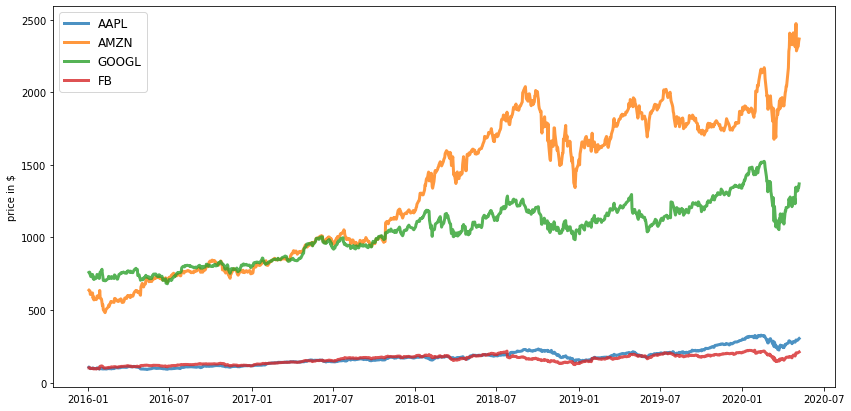

In [10]:
plt.figure(figsize=(14, 7))
for c in df.columns.values:
    print(c)
    plt.plot(df.index, df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

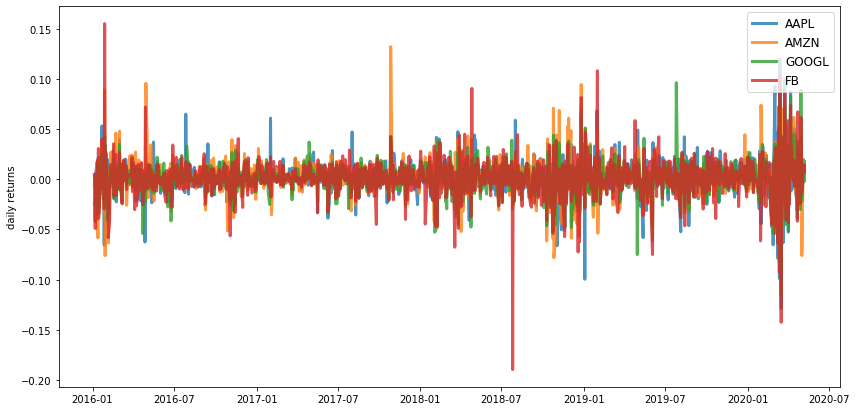

In [11]:
returns = df.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [12]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate, df):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(df.columns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, df):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate, df)
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
    return max_sharpe_allocation, min_vol_allocation

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.32
Annualised Volatility: 0.26


             AAPL   AMZN  GOOGL    FB
allocation  42.79  55.86   1.22  0.13
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.24
Annualised Volatility: 0.24


             AAPL   AMZN  GOOGL    FB
allocation  26.08  22.98  45.02  5.92


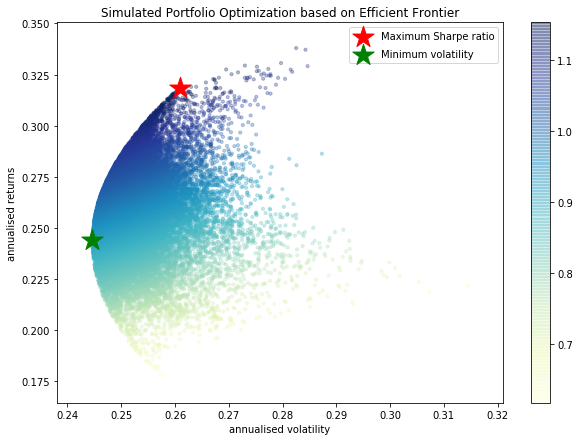

In [13]:
returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

max_sharpe_al, min_vol_al = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, df)

In [14]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.3
Annualised Volatility: 0.18


             AAPL   AMZN     FB  GOOGL
allocation  42.85  30.12  26.86   0.17
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.22
Annualised Volatility: 0.16


             AAPL  AMZN    FB  GOOGL
allocation  33.61  1.34  8.02  57.02


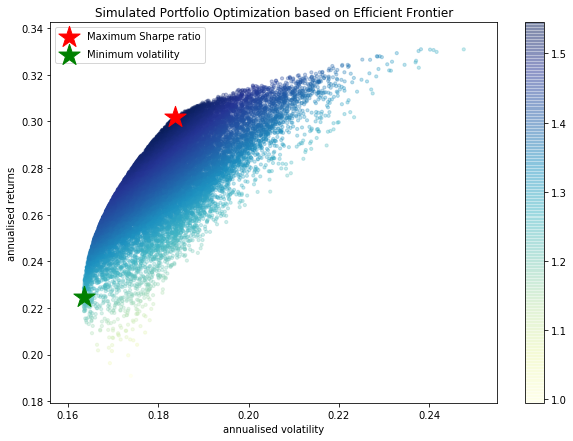

In [15]:
min_vol_al, max_sharpe_al = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, table)

In [68]:
df_red = pd.read_csv('C:/Users/antoi/Documents/Programming/portfolio-advisor/dashboard/data/tickers_september_2017_red.csv')

In [69]:
tickers = df_red['Ticker'].values

In [8]:
df = price_maker(tickers)
df.index = pd.to_datetime(df.index)
df = df.resample("1D").sum()
df = df[~df.isin([0])].dropna() # getting rid of weekends where stocks = 0
df.tail(20)

ticker_name:  BVS.L
ticker_name:  PJC
ticker_name:  BCAM.PA
ticker_name:  TATAGLOBAL.NS
ticker_name:  PHBN.F
ticker_name:  IPAPPM.NS
ticker_name:  CH8.SI


,DOX,GIL,ASR,TEO,PAC,AVX,BRKS,FWRD,ASTE,SDF.AX,...,INTU.MX,0637.HK,2320.HK,LIN.F,MANAKSIA.NS,MAN.PA,MANUGRAPH.NS,REPRO.NS,SAP.F,1304.TW
2017-11-15,63.820000,29.930000,170.360001,32.349998,89.660004,17.530001,25.830000,54.450001,51.700001,2.80,...,2919.350098,0.73,1.24,123.439003,68.949997,78.599998,46.549999,747.500000,95.806000,14.902000
2017-11-16,64.790001,30.379999,172.979996,33.389999,91.199997,18.030001,27.330000,54.950001,53.310001,2.82,...,2919.350098,0.73,1.25,125.953003,69.949997,79.650002,47.299999,759.250000,96.480003,14.951000
2017-11-21,64.779999,31.299999,175.789993,34.419998,93.980003,18.410000,28.910000,54.990002,55.250000,2.80,...,2920.000000,0.68,1.23,127.292000,69.599998,80.750000,47.049999,738.400024,98.250000,15.000000
2017-11-22,64.639999,31.370001,174.699997,34.970001,96.150002,18.290001,28.020000,54.889999,55.169998,2.79,...,2920.000000,0.69,1.25,127.697998,68.199997,82.099998,47.150002,732.250000,96.184998,15.098000
2017-11-28,65.239998,31.879999,173.130005,34.720001,96.900002,18.950001,27.549999,55.500000,54.470001,2.92,...,2920.000000,0.69,1.22,130.809998,79.150002,81.989998,52.599998,753.299988,97.105003,15.000000
2017-11-29,65.139999,31.770000,178.779999,34.880001,98.290001,18.230000,24.620001,55.930000,55.220001,2.90,...,2920.000000,0.70,1.24,130.550003,80.199997,82.160004,51.799999,749.799988,95.489998,15.049000
2017-11-30,65.290001,31.740000,179.110001,34.790001,99.550003,18.139999,24.889999,56.900002,55.369999,2.93,...,2920.000000,0.70,1.25,132.000000,82.349998,81.849998,50.950001,740.099976,94.949997,15.245100
2017-12-04,65.239998,31.180000,183.509995,35.990002,104.440002,17.629999,22.540001,57.730000,56.599998,3.00,...,2920.000000,0.69,1.25,130.203003,75.949997,81.599998,48.500000,707.150024,94.629997,15.882400
2017-12-05,64.879997,31.360001,182.419998,37.099998,104.010002,17.590000,23.010000,57.160000,56.459999,2.98,...,2920.000000,0.69,1.27,128.164993,73.199997,82.000000,48.099998,729.500000,94.199997,15.588200
2017-12-06,64.589996,31.490000,175.580002,37.020000,103.550003,17.280001,23.150000,57.500000,54.500000,3.01,...,2920.000000,0.66,1.24,127.765999,71.949997,81.800003,48.400002,704.650024,94.945000,15.490200


In [9]:
returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 5000000#25000
risk_free_rate = 0.0178

In [ ]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, df)

In [ ]:
min_vol_al.sort_values(axis = 1, by = 'allocation', ascending=False)

In [3]:
ticker = Ticker('VALE')

In [4]:
ticker.summary_profile

{'VALE': {'address1': 'Praia de Botafogo 186',
  'address2': 'Praia de Botafogo 186 Botafogo',
  'city': 'Rio de Janeiro',
  'state': 'RJ',
  'zip': '22250-145',
  'country': 'Brazil',
  'phone': '55 21 3485 5000',
  'website': 'http://www.vale.com',
  'industry': 'Other Industrial Metals & Mining',
  'sector': 'Basic Materials',
  'longBusinessSummary': 'Vale S.A., together with its subsidiaries, produces and sells iron ore and iron ore pellets for use as raw materials in steelmaking in Brazil and internationally. It operates through Ferrous Minerals, Coal, and Base Metals segments. The Ferrous Minerals segment produces and extracts iron ore and pellets, manganese, ferroalloys, and others ferrous products and services; and provides related logistic services. The Coal segment is involved in the extraction of metallurgical and thermal coal; and provides related logistic services. The Base Metals segment produces and extracts non-ferrous minerals, including nickel; and its by-products, s

# Getting companies that respect graham's rules

In [131]:
df = pd.read_csv('C:/Users/antoi/Downloads/tickers_september_2017_updated.csv')

In [132]:
df

,Unnamed: 0,Ticker,Name,Exchange,Category Name,Country,earnings,ratio,dividends
0,0,AAPL,Apple Inc.,NMS,Electronic Equipment,USA,"267,981,000",NaN,True
1,1,BAC,Bank of America Corporation,NYQ,Money Center Banks,USA,"90,249,000",NaN,True
2,2,AMZN,"Amazon.com, Inc.",NMS,Catalog & Mail Order Houses,USA,"296,274,000",NaN,False
3,3,T,AT&T Inc.,NYQ,Telecom Services - Domestic,USA,"175,138,000",NaN,True
4,4,GOOG,Alphabet Inc.,NMS,Internet Information Providers,USA,"166,677,000",NaN,False
...,...,...,...,...,...,...,...,...,...
20723,20723,2GB.F,2G energy AG,FRA,Diversified Machinery,France,"236,396",NaN,False
20724,20724,A7A.F,FinLab AG,FRA,Asset Management,France,"4,439",NaN,False
20725,20725,GROG,"GroGenesis, Inc.",PNK,Agricultural Chemicals,USA,63.978,NaN,False
20726,20726,INDSWFTLTD.NS,Ind-Swift Limited,NSI,Drugs - Generic,India,"2,890,311",NaN,False


In [133]:
df = df[df['earnings'].notna()]
df = df[df['earnings']!="-"]
df["earnings"] = df["earnings"].str.replace(',', '')
df["earnings"] = pd.to_numeric(df["earnings"], downcast="float")
df_red = df.loc[df['dividends']==True]
# df_red = df_red.loc[df_red['ratio']>2] # issue to solve
df_red = df_red.loc[df_red['earnings'] > 200000]

In [134]:
df_red

,Unnamed: 0,Ticker,Name,Exchange,Category Name,Country,earnings,ratio,dividends
0,0,AAPL,Apple Inc.,NMS,Electronic Equipment,USA,267980992.0,NaN,True
1,1,BAC,Bank of America Corporation,NYQ,Money Center Banks,USA,90249000.0,NaN,True
3,3,T,AT&T Inc.,NYQ,Telecom Services - Domestic,USA,175138000.0,NaN,True
5,5,MO,"Altria Group, Inc.",NYQ,Cigarettes,USA,20322000.0,NaN,True
6,6,DAL,"Delta Air Lines, Inc.",NYQ,Major Airlines,USA,34059000.0,NaN,True
...,...,...,...,...,...,...,...,...,...
20696,20696,SAP.F,SAP SE,FRA,Technical & System Software,France,28096000.0,NaN,True
20711,20711,ST5.F,STEICO SE,FRA,Diversified Machinery,France,280996.0,NaN,True
20712,20712,USX1.F,United States Steel Corporation,FRA,Steel & Iron,France,12186000.0,NaN,True
20715,20715,TEFN.MX,"Telefónica, S.A.",MEX,Wireless Communications,Mexico,47809000.0,NaN,True


# Which are tradable on Etoro?

In [28]:
import selenium

In [151]:
tickers = df_red.Ticker.to_list()
# len(tradable)

In [152]:
# Ratio

In [153]:
tradable_with_ratio = []

for ticker in tickers:
    try:
        ticker2 = Ticker(ticker)
        df_accounting = ticker2.balance_sheet()
        df_accounting = df_accounting.reset_index(drop=True)

        # Assets
        current_assets = df_accounting.iloc[0, cols.get_loc('endDate')+1 : cols.get_loc('totalCurrentAssets')]
        non_current_assets = df_accounting.iloc[0, cols.get_loc("longTermInvestments")+1:
                                     cols.get_loc("deferredLongTermAssetCharges")]
        total_assets = df_accounting.iloc[0,cols.get_loc("totalAssets")]

        # liabilities
        total_liabilities = df_accounting.iloc[0,cols.get_loc("totalLiab")]

        ratio = float(total_assets)/float(total_liabilities)

        if ratio > 2:
            tradable_with_ratio.append(ticker)
        else:
            pass
    except IndexError:
        pass
    except AttributeError:
        pass
        

In [154]:
stocks_respecting_graham = tradable_with_ratio
len(stocks_respecting_graham)

1210

In [158]:
from collections import defaultdict
import json

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import ElementClickInterceptedException

import time

from selenium.common.exceptions import NoSuchElementException

import pandas as pd
import numpy as np

In [170]:
driver = webdriver.Chrome(executable_path=r"C:\Programs\chromedriver.exe")

In [171]:
def price_maker(tickers):
    df_concated = pd.DataFrame()
    for ticker_name in tickers:
        ticker = Ticker(ticker_name)
        df = ticker.history(period='max', interval='1d', start='2016-01-04', end='2020-08-02')
        try:
            df_concated = pd.concat([df_concated, df['close'].rename(str(ticker_name))], axis=1)
        except KeyError:
            print("ticker_name: ", ticker_name)
    return df_concated

tradable = []
for ticker in stocks_respecting_graham:
    location = "https://www.etoro.com/markets/" + ticker.lower()
    driver.get(location)
    time.sleep(2)
    current_url = driver.current_url
    if current_url == location:
        tradable.append(ticker)
        


In [177]:
len(tradable)

867

Only select 20 portfolios + the ones we invested + the ones you think should be added

In [191]:
# get rows in dataframe that are in tradable
df_red2 = df_red.loc[df_red['Ticker'].isin(tradable)]
# get only 20 rows according to  Country
sample_df = df_red2.groupby('Country').apply(lambda x: x.sample(frac=0.05))
# sample_df = df_red2.groupby('Country').apply(lambda x: x.sample(n = 20, replace=True))

        


In [192]:
sample_df

Unnamed: 0         Ticker  \
Country                                           
Argentina      11349       11349         MCD.BA   
Australia      11771       11771         MAQ.AX   
Belgium        12408       12408        BEKB.BR   
Brazil         12315       12315       BRSR6.SA   
               1827         1827       EMBR3.SA   
Canada         1959         1959         CWX.TO   
France         4976         4976          UG.PA   
               3809         3809          VOW.F   
               9181         9181          DG.PA   
               4972         4972          VK.PA   
               14693       14693          EDL.F   
               10233       10233         TNE2.F   
               8920         8920          SRB.F   
Germany        1994         1994         BEI.DE   
               11091       11091         BMT.SG   
               13337       13337         BSU.SG   
               10522       10522         D6H.DE   
               10779       10779         B5A.DE   
Hong Kong      14222       14222        3328.HK   
               12835       12835        0129.HK   
               7164         7164        3368.HK   
               14187       14187        1988.HK   
               14178       14178        3378.HK   
               14194       14194        1099.HK   
India          11186       11186    ANSALHSG.NS   
               9431         9431  WSTCSTPAPR.NS   
               14536       14536  DATAMATICS.NS   
               10223       10223    ADANIENT.NS   
Italy          14092       14092         CIR.MI   
Mexico         14452       14452     FRAGUAB.MX   
               15019       15019          GD.MX   
               9049         9049          CL.MX   
Norway         7838         7838         TEL.OL   
Singapore      9555         9555         BS6.SI   
Spain          3490         3490         ITX.MC   
Sweden         9898         9898      EKTA-B.ST   
Taiwan         8736         8736        3617.TW   
USA            136           136            AVT   
               2548         2548            CUK   
               1091         1091            BEN   
               2163         2163           MSFT   
               6194         6194           QCOM   
United Kingdom 6073         6073          IHG.L   
               11438       11438         ASHM.L   
               5684         5684         SGRO.L   

                                                           Name Exchange  \
Country                                                                    
Argentina      11349                     McDonald's Corporation      BUE   
Australia      11771            Macquarie Telecom Group Limited      ASX   
Belgium        12408                              NV Bekaert SA      BRU   
Brazil         12315  Banco do Estado do Rio Grande do Sul S.A.      SAO   
               1827                                Embraer S.A.      SAO   
Canada         1959        CanWel Building Materials Group Ltd.      TOR   
France         4976                                Peugeot S.A.      PAR   
               3809               Volkswagen Aktiengesellschaft      FRA   
               9181                                    VINCI SA      PAR   
               4972                                Vallourec SA      PAR   
               14693                                    Edel AG      FRA   
               10233                           Telefónica, S.A.      FRA   
               8920                       Starbucks Corporation      FRA   
Germany        1994               Beiersdorf Aktiengesellschaft      GER   
               11091            BRITISH AMERICAN TOBACCO PLC Re      STU   
               13337                                  BP p.l.c.      STU   
               10522                               DATAGROUP SE      GER   
               10779                   BAUER Aktiengesellschaft      GER   
Hong Kong      14222           Bank of Communications Co., Ltd.      HKG   
               12835        

In [213]:
# get their tickers
trading = sample_df['Ticker'].to_list()

former_tickers = ['BA','UG.PA','CAR']
for ticker in former_tickers: 
    if ticker not in trading:
        trading.append(ticker)

In [214]:
# tickers you want to invest
wanted_tickers = ['MC.PA','RMS','CDI.PA','TIF','BRBY.L']
trading = trading + wanted_tickers

In [215]:
trading

['MCD.BA',
 'MAQ.AX',
 'BEKB.BR',
 'BRSR6.SA',
 'EMBR3.SA',
 'CWX.TO',
 'UG.PA',
 'VOW.F',
 'DG.PA',
 'VK.PA',
 'EDL.F',
 'TNE2.F',
 'SRB.F',
 'BEI.DE',
 'BMT.SG',
 'BSU.SG',
 'D6H.DE',
 'B5A.DE',
 '3328.HK',
 '0129.HK',
 '3368.HK',
 '1988.HK',
 '3378.HK',
 '1099.HK',
 'ANSALHSG.NS',
 'WSTCSTPAPR.NS',
 'DATAMATICS.NS',
 'ADANIENT.NS',
 'CIR.MI',
 'FRAGUAB.MX',
 'GD.MX',
 'CL.MX',
 'TEL.OL',
 'BS6.SI',
 'ITX.MC',
 'EKTA-B.ST',
 '3617.TW',
 'AVT',
 'CUK',
 'BEN',
 'MSFT',
 'QCOM',
 'IHG.L',
 'ASHM.L',
 'SGRO.L',
 'BA',
 'CAR',
 'MC.PA',
 'RMS',
 'CDI.PA',
 'TIF',
 'BRBY.L']

In [216]:
df = price_maker(trading)
df.index = pd.to_datetime(df.index)
df = df.resample("1D").sum()
df = df[~df.isin([0])].dropna() # getting rid of weekends where stocks = 0

In [217]:
# tradable = df_red2['Ticker'].to_list()
# # tradable.append('ADBE')

# What balance?

In [218]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy.optimize as scoplt.style.use('fivethirtyeight')
np.random.seed(777) 

In [219]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate, df):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(df.columns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, df):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate, df)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    print("results[0,max_sharpe_idx], results[1,max_sharpe_idx]: ", results[0,max_sharpe_idx], results[1,max_sharpe_idx])
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
    return max_sharpe_allocation, min_vol_allocation

In [220]:
# tickers = tradable
# df = price_maker(tickers)
# df.index = pd.to_datetime(df.index)
# df = df.resample("1D").sum()
# df = df[~df.isin([0])].dropna() # getting rid of weekends where stocks = 0
# df.tail(20)

In [221]:
returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 1500000
risk_free_rate = 0.0178

Text(0, 0.5, 'daily returns')

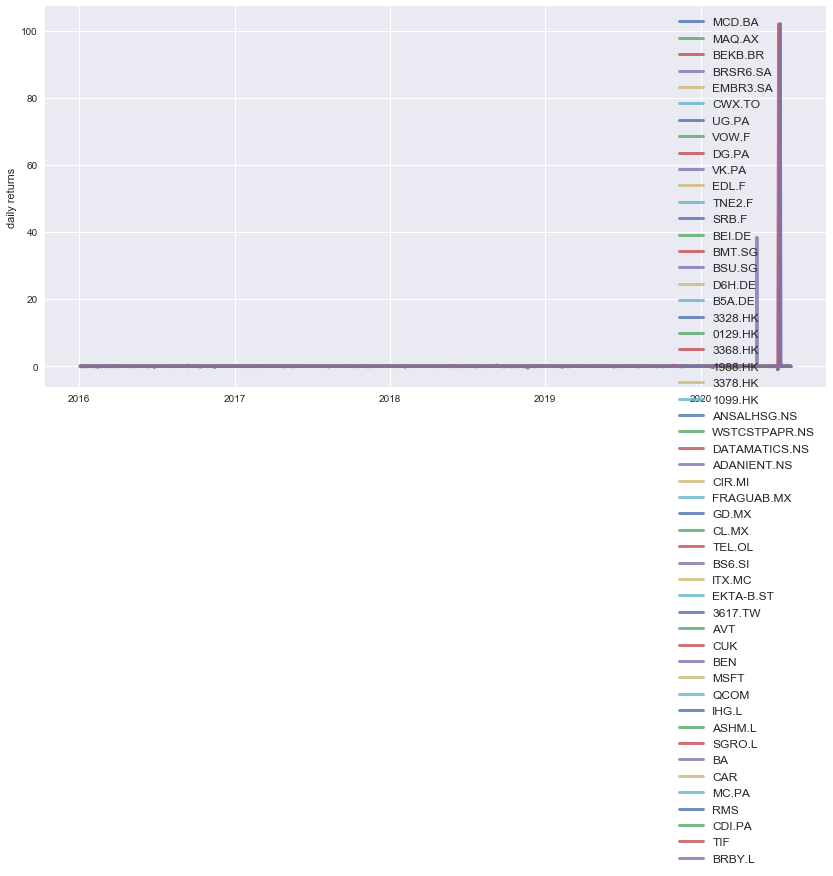

In [222]:
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

results[0,max_sharpe_idx], results[1,max_sharpe_idx]:  0.4025507869131691 0.5028786696622506
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.5
Annualised Volatility: 0.4


            MCD.BA  MAQ.AX  BEKB.BR  BRSR6.SA  EMBR3.SA  CWX.TO  UG.PA  VOW.F  \
allocation    2.48    4.04      2.8      4.35      2.55    3.01   2.71   1.07   

            DG.PA  VK.PA  ...  IHG.L  ASHM.L  SGRO.L    BA   CAR  MC.PA   RMS  \
allocation   2.17   1.13  ...   0.04    0.11    0.32  0.34  4.23   2.94  2.01   

            CDI.PA   TIF  BRBY.L  
allocation    0.33  3.02    0.26  

[1 rows x 52 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.19
Annualised Volatility: 0.21


            MCD.BA  MAQ.AX  BEKB.BR  BRSR6.SA  EMBR3.SA  CWX.TO  UG.PA  VOW.F  \
allocation    3.38    2.09     1.18      3.48      2.87

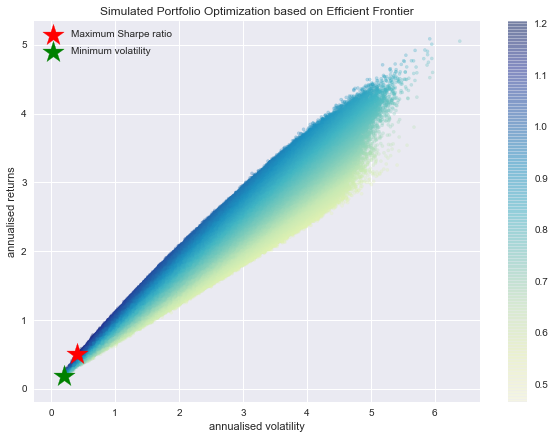

In [223]:
min_vol_al, max_sharpe_al = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, df)

In [224]:
max_sharpe_al.transpose()

,allocation
MCD.BA,3.38
MAQ.AX,2.09
BEKB.BR,1.18
BRSR6.SA,3.48
EMBR3.SA,2.87
CWX.TO,1.72
UG.PA,0.75
VOW.F,0.06
DG.PA,0.41
VK.PA,0.46


In [225]:
df.to_csv("stocks.csv")

              MCD.BA    MAQ.AX   BEKB.BR  BRSR6.SA  EMBR3.SA    CWX.TO  \
Field1                                                                   
2016-01-05  0.000000  0.020714  0.051835 -0.027299  0.000000  0.008547   
2016-01-07  0.000000 -0.093035 -0.062053 -0.060855 -0.036469 -0.045710   
2016-01-11  0.013730  0.000000 -0.034835  0.001959 -0.000354 -0.057289   
2016-01-12  0.000000  0.030772  0.003185  0.005854  0.022394  0.059514   
2016-01-13  0.000000 -0.001213 -0.003363 -0.043745 -0.022748 -0.102894   
...              ...       ...       ...       ...       ...       ...   
2020-07-24  0.023551  0.021122 -0.007708 -0.011150 -0.024632 -0.001885   
2020-07-27  0.030730 -0.010832 -0.005970  0.013918  0.000000  0.029742   
2020-07-28 -0.022745  0.007379 -0.013261 -0.004849  0.018530  0.010929   
2020-07-29 -0.007985 -0.003682  0.028120  0.006920  0.001223  0.017954   
2020-07-30  0.020732  0.019769 -0.016657  0.029224 -0.028520 -0.005352   

               UG.PA     VOW.F     DG

--------------------------------------------------
---- Estadisticas Sharper Ratio ----
--------------------------------------------------

Maximo Sharpe Ratio: 1.9047807390519356
Pesos Del Portafolio:
[[0.1696335  0.14293141 0.         0.06436525 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.07365362 0.         0.         0.00737823
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.43328254 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.00623843 0.         0.00325944 0.         0.02220135
  0.         0.         0.07705623 0.        ]]
    
Los Pesos Suman: 1.0000
    

Redimiento del Maximo Sharpe Ratio:[[0.31001652]]

Volatilidad del Maximo Sharpe Ratio:[[0.16275706]]


Verificar cuales suman 1: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.

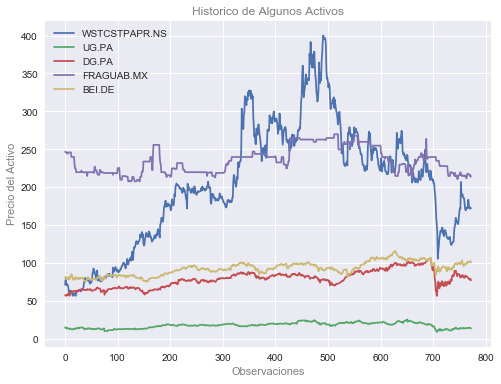

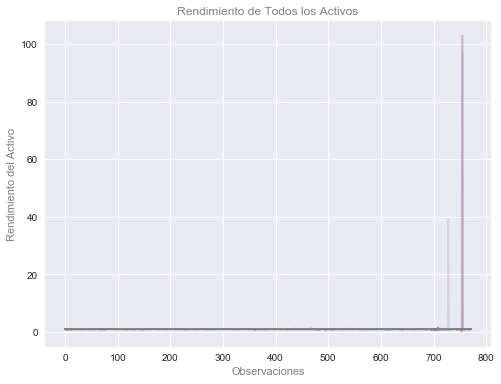

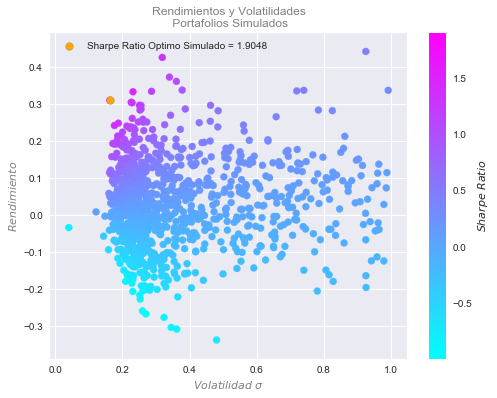

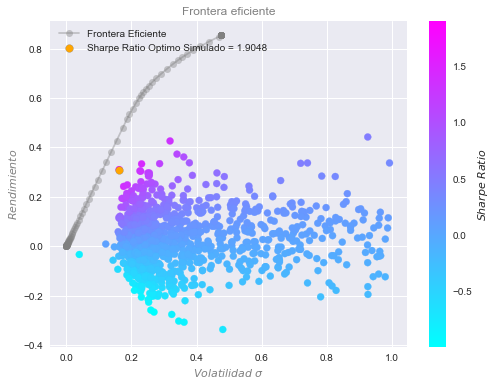

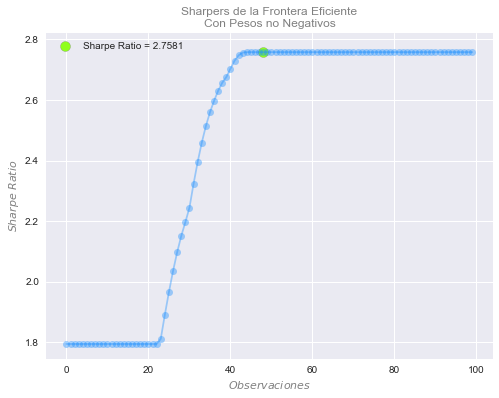

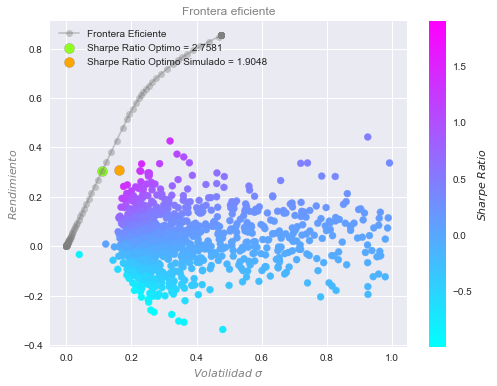

In [226]:
import numpy as np
import pandas as pd

import cvxopt as opt
from cvxopt import solvers #, blas

from matplotlib import pyplot as plt
plt.style.use('seaborn')
np.random.seed(9062020)


# Cargar y limpiar datos
df = pd.read_csv("stocks.csv", sep=",", engine="python")
#���Field 1 la columna tiene caracteres extranios
df.columns = ['Field1' if i == 0 else x for i, x in enumerate(df.columns)]
df.set_index(df.columns[0], inplace=True)

# Seleccionamos 5 activos al azar
activos = np.random.permutation(df.columns)[:5]
plt.figure(figsize=(8,6))
plt.title('Historico de Algunos Activos', color='gray')
for activo in activos:
    plt.plot(df[activo].to_numpy(), label=activo)
plt.ylabel('Precio del Activo', color='gray')
plt.xlabel('Observaciones', color='gray')
plt.legend(loc='upper left')

# Por que usar rendimiento logaritmicos
# https://quantdare.com/por-que-usar-rendimientos-logaritmicos/
df = df / df.shift(1) 
df.dropna(inplace=True)
log_df = np.log(df)
print(log_df)


# Grafico con Rendimientos historicos
plt.figure(figsize=(8,6))
plt.title('Rendimiento de Todos los Activos', color='gray')
plt.plot(df.to_numpy(), alpha=0.2)
plt.ylabel('Rendimiento del Activo', color='gray')
plt.xlabel('Observaciones', color='gray')



def metricas_historicas_portafolio(portafolio, dias_anual):
    """
        Da un pequenio reporte sobre las observaciones de
        cada activo contenido en el portafolio, para 
        devolver finalmente dos matrices
        `portafolio`: es un dataframe de observaciones (filas)
        por activos (columnas) historico
        `dias_anual`: es un entero que indica cuantos dias
        tiene el anio, asumiendose para ellos que las
        observaciones contenidas en `portafolio` son diarias
        `return`: devuelve las matrices o arrays de rendimientos
        esperados y la de covarianza del portafolio historico,
        asi como el numero de activos
    """

    # Metricas Historicas
    activos_en_portafolio = portafolio.shape[1]
    rendimientos_anual = dias_anual * portafolio.mean()
    sigma_de_rendimientos_anual = dias_anual * portafolio.std()
    varianza_de_rendimientos_anual = dias_anual * portafolio.std() ** 2  # diagonal de la covarianza de rendimientos
    covarianza_de_rendimientos_anual = dias_anual * portafolio.cov()

    # Reporte de Historicos
    print(f"\nNumero de Activos:\n{activos_en_portafolio}")
    print(f"\nRendimiento:\n{rendimientos_anual}")
    print(f"\nDesviacion Estandar:\n{sigma_de_rendimientos_anual}")
    print(f"\nVarianza:\n{varianza_de_rendimientos_anual}")
    print(f"\nCovarianza:\n{covarianza_de_rendimientos_anual}")

    # Matrices con las Estadisticas Hitoricas de Interes
    # la variable `C`es mayuscula 

    p = np.asmatrix(rendimientos_anual.to_numpy())
    C = np.asmatrix(covarianza_de_rendimientos_anual.to_numpy())

    return p, C, activos_en_portafolio


p, C, numero_de_activos = metricas_historicas_portafolio(log_df, 252)
#print(p ,p.shape[1])

def resultados_portafolio(p,w,C):
    """
        Dados unos pesos de colocacion para un
        portafolio y teniendose los rendimientos y
        covarianzas historicas, se obtiene el
        rendimiento y volatilidad del portafolio
        `p`: matriz con rendimientos historicos del
        portafolio
        `w`: peso que se empleara para colocar los
        los fondos en los activos correspondientes
        del portafolio
       `C`: matriz con la covarianza historico del
        portafolio
        `return`: el redimiento y riesgo (volatilida)
        del portafolio
    """
    mu = w * p.T                           # Rendimiento Esperado
    sigma = np.sqrt(w * C * w.T)           # Volatilidad

    return mu, sigma

    

def simular_pesos_portafolio(numero_de_activos):
    """ 
        Generar pesos aleatorios para cada
        activo en el portafolio
        `numero_de_activos`: es entero
        `return`:El peso de cada uno de los 
         activos en el portafolio cuya suma es 1
         como matriz
    """
    pesos = np.random.random(numero_de_activos)
    pesos *= sum([np.random.binomial(1, 0.08, numero_de_activos) for _ in range(2)])
    pesos = np.asmatrix(pesos / sum(pesos) )

    return pesos



def simular_portafolio(p, C, numero_de_activos, libre_riesgo=0, limite_volatilidad=1):
    """
        Genera el redimiento y la desviacion estandar
        de una posible combinacion en la inversion
        de cada activo para un portafolio dado
        `p`: matriz con rendimientos historicos del
        portafolio
       `C`: matriz con la covarianza historico del
        portafolio 
        `numero_de_activos`: entero que indica la cantidad
        de activos en el portafolio
        `libre de riesgo`: flotante que va de 0 a 1
        `limite_volatilidad`: es para mantener la
        volatilidad hasta un tope durante la
        simulacion
        `return`: el peso de inversion, el rendimiento
        esperado (mu) y la desviacion estandar (sigma)
        tambien conocida como volatilidad para el 
        portafolio generado así como el Sharpe Ratio
        todas las salidas son arrays
    """
    
    # Generar una posible combinacion del portafolio
    p = p
    w = simular_pesos_portafolio(numero_de_activos)
    C = C

    mu, sigma = resultados_portafolio(p,w,C)

    
    sharpe_ratio = (mu - libre_riesgo) / sigma
    # Esta recursividad reduce los valores atípicos
    # para mantener el portafolio de interés
    # tambien se puede desarrollar con `while` pero
    # se requiere más codigo
    if sigma > limite_volatilidad:
        return simular_portafolio(p, C, numero_de_activos, libre_riesgo, limite_volatilidad)
    
    return w, mu, sigma, sharpe_ratio

peso_activos, rendimiento, volatilidad, sharpe_ratio = simular_portafolio(p, C, numero_de_activos)

print("-"*40)
print('---- Portafolio Simulado ----')
print("-"*40)
print(f"\nSharpe Ratio: {sharpe_ratio}")
print(f"""
Pesos Del Portafolio Simulado:\n{peso_activos}
 \nLos Pesos Suman: {peso_activos.sum():.4f}
""")


print(f"\nRedimiento del Portafolio Simulado:{rendimiento}")
print(f"\nVolatilidad del Portafolio Simulado:{volatilidad}\n")



def simulacion_de_portafolios(numero_de_portafolios, p, C,
    numero_de_activos, libre_riesgo=0, limite_volatilidad=1):

    """
        Genera los rendimientos y volatidades para un conjunto
        de portafolios
        `numero_de_portafolios`: entero que indica la
        cantidad de replicas o simulaciones a efectuarse
        `p`: matriz con rendimientos historicos del
        portafolio
       `C`: matriz con la covarianza historico del
        portafolio 
        `numero_de_activos`: entero que indica la cantidad
        de activos en el portafolio
        `libre de riesgo`: flotante que va de 0 a 1
        `limite_volatilidad`: es para mantener la
        volatilidad hasta un tope durante la
        simulacion
        `return`: los pesos, rendimientos esperados así
        como las volatidades `desviacion estandar`
        para cada uno de los portafolios simulados
    """

    pesos, rendimientos, volatilidades, sharper_ratios = zip(*[
        simular_portafolio(p, C, numero_de_activos, libre_riesgo, limite_volatilidad)
        for _ in range(numero_de_portafolios)
    ])

    pesos, rendimientos, volatilidades, sharper_ratios = \
    np.array(pesos), np.array(rendimientos), np.array(volatilidades), np.array(sharper_ratios)
    
    return pesos, rendimientos, volatilidades, sharper_ratios



pesos, rendimientos, volatilidades, sharper_ratios = simulacion_de_portafolios(
    numero_de_portafolios=1000,
    p=p,
    C=C,
    numero_de_activos=numero_de_activos,
    libre_riesgo=0
)

# Metricas Sharper
def rsharpe_maximo(sharper_ratios, rendimientos, volatilidades):
    maximo_sharpe_ratio = sharper_ratios.max()
    indice_maximo_sharpe_ratio = sharper_ratios.argmax()
    pesos_optimos_simulados = pesos[indice_maximo_sharpe_ratio, :]
    maximo_sharpe_ratio_rendimiento = rendimientos[indice_maximo_sharpe_ratio]
    maximo_sharpe_ratio_volatilidad = volatilidades[indice_maximo_sharpe_ratio]

    print("-" * 50)

    print('---- Estadisticas Sharper Ratio ----')
    print("-" * 50)
    
    print(f"\nMaximo Sharpe Ratio: {maximo_sharpe_ratio}")

    print(f"""Pesos Del Portafolio:\n{pesos_optimos_simulados}
    \nLos Pesos Suman: {pesos_optimos_simulados.sum():.4f}
    """ )
    df_portfolio = pd.DataFrame(data=pesos_optimos_simulados,  # values
                            columns = log_df.columns)
    df_portfolio.to_csv("df_portfolio.csv")
    print(f"\nRedimiento del Maximo Sharpe Ratio:{maximo_sharpe_ratio_rendimiento}")
    print(f"\nVolatilidad del Maximo Sharpe Ratio:{maximo_sharpe_ratio_volatilidad}\n")

    return maximo_sharpe_ratio, maximo_sharpe_ratio_volatilidad, maximo_sharpe_ratio_rendimiento


# Estadisticas de Montecarlo
maximo_sharpe_ratio, maximo_sharpe_ratio_volatilidad, maximo_sharpe_ratio_rendimiento = rsharpe_maximo(sharper_ratios, rendimientos, volatilidades)



plt.figure(figsize=(8,6))
plt.title('Rendimientos y Volatilidades\n Portafolios Simulados', color='gray')
plt.scatter(volatilidades, rendimientos, c=sharper_ratios, cmap='cool')
plt.colorbar(label=r"$Sharpe\ Ratio$")

# Optimo Sharpe Ratio Simulado
plt.scatter(
    maximo_sharpe_ratio_volatilidad,
    maximo_sharpe_ratio_rendimiento,
    c='orange', s=60, edgecolors='gray', label=f'Sharpe Ratio Optimo Simulado = {maximo_sharpe_ratio:.4f}'
)

plt.ylabel(r'$Rendimiento$', color='gray')
plt.xlabel(r'$Volatilidad\ \sigma$', color='gray')
plt.legend(loc="upper left")




# Resolviendo el modelo cuadratico
# http://cvxopt.org/userguide/coneprog.html
# http://cvxopt.org/examples/book/portfolio.html
# http://cvxopt.org/examples/tutorial/qp.html
def portafolio_optimo(p, C, numero_de_activos):
    """
        Genera los puntos para la Frontera Eficiente
        `p`: matriz con rendimientos historicos del
        portafolio
       `C`: matriz con la covarianza historico del
        portafolio 
        `numero_de_activos`: entero que indica la cantidad
        de activos en el portafolio
        `retorna`: arrays, de los pesos de cada portafolio 
        correspondientes a cada punto de la frontera 
        eficiente, siendo dichos puntos el par rendimiento
        y volatilidad 
    """

    # Se establece saltos discretos para hallar la
    # la frontera eficiente estos seran los 
    # `targets` u objetivos que se fijan para optimizar
    N = 100
    n = numero_de_activos
    #mus = np.power(10, 5 * np.arange(N) / N - 1) # tiene que ser lista tolist()
    mus = [ 10**(5.0*t/N-1.0) for t in range(N) ]
    
    # convertir el p y C a matrices del tipo cvxopt
    # en el caso de p se trabaja con su transpuesta
    pbar = opt.matrix(p.T)
    S = opt.matrix(C)

    # Crear las matrices de restricciones
    # Gx <= h
    G = -opt.matrix(np.eye(n))   # matriz identidad negativa n x n 
    h = opt.matrix(0.0, (n ,1))

    # Ax = b
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)         # La suma de los pesos es 1


    # Calcular los pesos de la frontera eficiente
    # Empleando Programacion Cuadratica
    # Pero primero silenciamos el solver (es opcional)
    solvers.options['show_progress'] = False
    portafolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]

    # Calcular los rendimientos y volatilidades o riesgos
    # para la frontera eficiente
    # Estas implementaciones funcionan... hay que importar "blas"
    # pero el codigo que esta fuera de este codigo
    # requiere que se redimensionen los rendimientos, volatilidades
    # para que funcionen
    #rendimientos = [blas.dot(pbar, x) for x in portafolios]
    #volatilidades = [np.sqrt(blas.dot(x, S*x)) for x in portafolios]

    rendimientos, volatilidades = zip(*[
        resultados_portafolio(p, np.array(w).T, C) for w in portafolios
    ])


    # Calcular el portafolio optimo
    #pesos = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x'] # # No funciona para lo que se quiere hacer mas adelante
    pesos = [np.asarray(x) for x in portafolios]

    pesos = np.asarray(pesos)
    rendimientos = np.asarray(rendimientos)
    volatilidades = np.asarray(volatilidades)

    return pesos, rendimientos, volatilidades


w_optimos, mu_optimos, sigma_optimos = portafolio_optimo(p, C, numero_de_activos)



########################################
# Frontera Eficiente y Simulacion
########################################
plt.figure(figsize=(8,6))
plt.title('Frontera eficiente', color='gray')

# Frontera eficiente
plt.plot(sigma_optimos.reshape((1,-1))[0], mu_optimos.reshape((1,-1))[0], 'y-o', color='gray', alpha=0.4, label='Frontera Eficiente')

# Simulados
plt.scatter(volatilidades, rendimientos, c=sharper_ratios, cmap='cool')
plt.colorbar(label=r"$Sharpe\ Ratio$")

# Optimo Sharpe Ratio Simulado
plt.scatter(
    maximo_sharpe_ratio_volatilidad,
    maximo_sharpe_ratio_rendimiento,
    c='orange', s=60, edgecolors='gray', label=f'Sharpe Ratio Optimo Simulado = {maximo_sharpe_ratio:.4f}'
)

plt.ylabel(r'$Rendimiento$', color='gray')
plt.xlabel(r'$Volatilidad\ \sigma$', color='gray')
plt.legend(loc="upper left")



########################################
# Ratio de Sharper
########################################
print("\nVerificar cuales suman 1: ")
print(np.array([x.sum() for x in w_optimos]))

filtrar_pesos_positivos = np.array([(x>=0).all() for x in w_optimos])
print("\nVerificar que todos los pesos sean >= 0: ")
print(filtrar_pesos_positivos)
print(w_optimos.shape, mu_optimos.shape, sigma_optimos.shape)


w_optimos = w_optimos[filtrar_pesos_positivos]
mu_optimos = mu_optimos [filtrar_pesos_positivos]
sigma_optimos = sigma_optimos[filtrar_pesos_positivos]


print("\nVerificar que todos los pesos sean >= 0: ")
print(np.array([(x>=0).all() for x in w_optimos]))
print(w_optimos.shape, mu_optimos.shape, sigma_optimos.shape)


libre_riesgo = 0
rsharpe_optimos = (mu_optimos - libre_riesgo) / sigma_optimos
rsharpe_optimos = rsharpe_optimos.reshape((1,-1)).reshape((1,-1)) # quitarle dimensiones


maximo_rsharpe, maximo_rsharpe_volatilidad, maximo_rsharpe_rendimiento = rsharpe_maximo(rsharpe_optimos, mu_optimos, sigma_optimos)


plt.figure(figsize=(8,6))
plt.title('Sharpers de la Frontera Eficiente\nCon Pesos no Negativos', color='gray')

# Optimo Sharpe Ratio Frontera Eficiente
plt.scatter(
    rsharpe_optimos[0].argmax(),
    maximo_rsharpe,
    c='#90ff1e', s=100, edgecolors='gray', label=f'Sharpe Ratio = {maximo_rsharpe:.4f}'
)

plt.plot(rsharpe_optimos[0], 'y-o', color='dodgerblue', alpha=0.4)

plt.ylabel(r'$Sharpe\ Ratio$', color='gray')
plt.xlabel(r'$Observaciones$', color='gray')
plt.legend(loc="upper left")




########################################
# Todo Junto:
# Ratio de Sharper Optimo
# Frontera Eficiente y Simulacion
########################################
w_optimos, mu_optimos, sigma_optimos = portafolio_optimo(p, C, numero_de_activos)
libre_riesgo = 0
rsharpe_optimos = (mu_optimos - libre_riesgo) / sigma_optimos
rsharpe_optimos = rsharpe_optimos.reshape((1,-1)).reshape((1,-1)) # quitarle dimensiones



plt.figure(figsize=(8,6))
plt.title('Frontera eficiente', color='gray')

# Frontera eficiente
plt.plot(sigma_optimos.reshape((1,-1))[0], mu_optimos.reshape((1,-1))[0], 'y-o', color='gray', alpha=0.4, label='Frontera Eficiente')

# Simulados
plt.scatter(volatilidades, rendimientos, c=sharper_ratios, cmap='cool')
plt.colorbar(label=r"$Sharpe\ Ratio$")

# Optimo Sharpe Ratio Frontera Eficiente
idx_rshape_optimo = np.where(rsharpe_optimos[0] == maximo_rsharpe)
plt.scatter(
    sigma_optimos.reshape((1, -1))[0][idx_rshape_optimo],   # eje volatilidad
    mu_optimos.reshape((1,-1))[0][idx_rshape_optimo],       # eje rendimientos
    c='#90ff1e', s=100, edgecolors='gray', label=f'Sharpe Ratio Optimo = {maximo_rsharpe:.4f}'
)

# Optimo Sharpe Ratio Simulado
plt.scatter(
    maximo_sharpe_ratio_volatilidad,
    maximo_sharpe_ratio_rendimiento,
    c='orange', s=100, edgecolors='gray', label=f'Sharpe Ratio Optimo Simulado = {maximo_sharpe_ratio:.4f}'
)

plt.ylabel(r'$Rendimiento$', color='gray')
plt.xlabel(r'$Volatilidad\ \sigma$', color='gray')
plt.legend(loc="upper left")



########################################
# Se muestran todos los lienzos
########################################
plt.show()

In [227]:
df_portfolio = pd.read_csv("df_portfolio.csv")

In [228]:
df_portfolio.T

,0
Unnamed: 0,0.000000
MCD.BA,0.024382
MAQ.AX,0.073452
BEKB.BR,0.000000
BRSR6.SA,0.000000
EMBR3.SA,0.000000
CWX.TO,0.000000
UG.PA,0.000000
VOW.F,0.141365
DG.PA,0.000000
